In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/FDSML_/

/content/drive/MyDrive/FDSML_


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import hinge_loss
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## Lettura del dataset

In [ ]:
data = pd.read_csv('TrainExpImp.csv')
print(data.shape)
diseaseList = np.empty((0,12))
with open('disease.txt') as f:
    lines = f.readlines()
    for el in lines:
      el = el.replace('\n', '')
      diseaseList = np.append(diseaseList, el)

X = data.to_numpy()
y = X[:, 100]
X = X[:, :100]

(1912, 101)


# Validazione con negative log loss

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')
y_pred_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_log_loss')
print(y_pred_score)
print(f"Mean loss score: {np.mean(y_pred_score)}")

[-0.76465587 -0.75610203 -0.71963817 -0.70881429 -0.7310488 ]
Mean loss score: -0.7360518318711223


In [ ]:
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')

clf.fit(X, y)
est = clf.estimators

for c in est:
  c[1].fit(X_train, y_train)

for c in est:
  prob = c[1].predict_proba(X_test[23:26, :])
  predicted = c[1].predict(X_test[23:26, :])
  print(f"{c[0]}: {predicted}")
  print(f"{c[0]} probabilities: {prob}")
print(f"True label: {y_test[23:26]}")


svc: ['Mastitis' 'Conjunctivitis' 'Enteritis']
svc probabilities: [[7.86160874e-04 1.02914973e-02 2.34138147e-03 6.44390576e-03
  5.32656746e-03 3.22696544e-04 3.38886552e-03 9.60064302e-01
  5.09248261e-03 4.35323227e-04 4.22798910e-03 1.27882814e-03]
 [3.46990931e-03 8.60569481e-01 1.21805930e-02 7.20471993e-02
  6.10320348e-03 4.56625421e-03 1.04264247e-02 9.73498782e-03
  4.08465501e-03 4.36208095e-03 8.96138757e-03 3.49382343e-03]
 [9.49134052e-05 9.10102562e-03 1.81892183e-03 1.46564362e-03
  9.79080152e-01 9.36833166e-04 6.95280363e-04 2.85679908e-03
  9.43677318e-04 6.88384369e-05 4.73490733e-04 2.46442492e-03]]
rf: ['Mastitis' 'Conjunctivitis' 'Enteritis']
rf probabilities: [[1.00000000e-05 2.32865613e-04 2.11046832e-04 2.53446478e-04
  2.01391185e-04 8.26446281e-05 7.10887749e-04 9.97187635e-01
  6.25000000e-04 4.47933884e-05 4.32024793e-04 8.26446281e-06]
 [7.53856942e-05 9.32639421e-01 1.77480820e-04 6.51538821e-02
  1.32193787e-04 1.99495982e-04 4.74570572e-04 3.28357388e-

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10), scorer=None):
    
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, scoring=scorer)
    if scorer=='neg_log_loss':
      train_scores = -train_scores
      test_scores = -test_scores
    else:
      train_scores = train_scores
      test_scores = test_scores 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Validation curves

**Loss Curves**

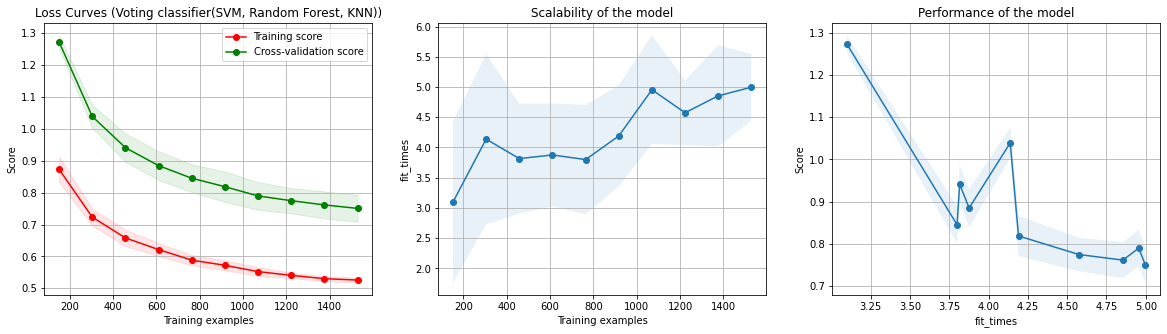

In [ ]:
title = r"Loss Curves: Voting classifier(SVM, Random Forest, KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1, scorer='neg_log_loss')

plt.show()

**Learning Curves**

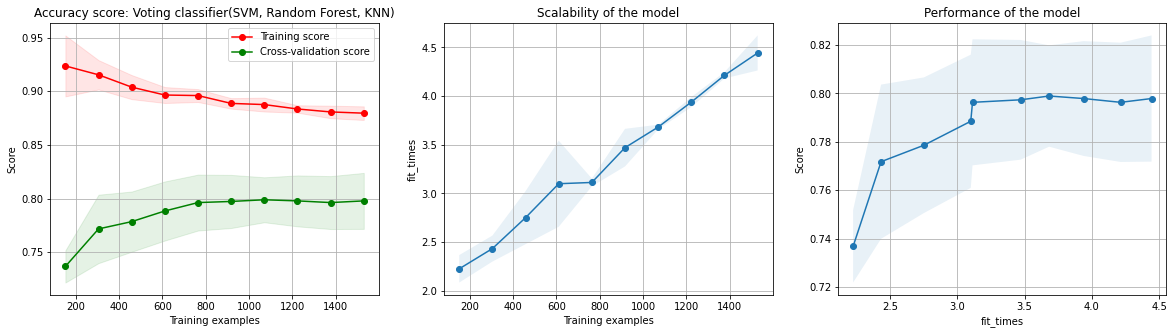

In [ ]:
title = r"Accuracy score: Voting classifier(SVM, Random Forest, KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

**Precision Cruves**

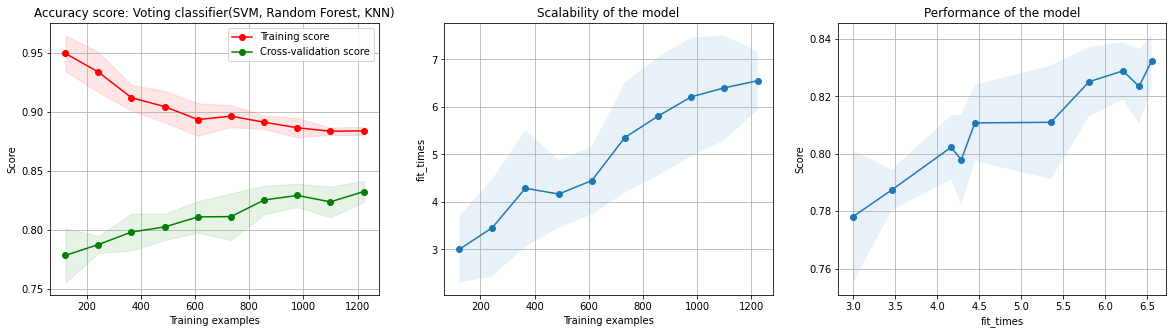

In [ ]:
title = r"Precision score: Voting classifier(SVM, Random Forest, KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1, scorer=make_scorer(precision_score, average='macro'))
plt.show()

# Testing

accuracy: 0.783289817232376 precision: 0.7851736084250698  recall: 0.784288139760164


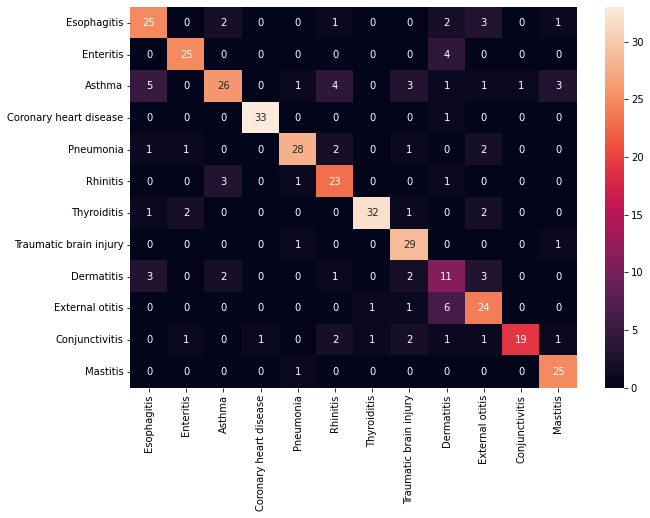

In [ ]:
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)
clfKNN = KNeighborsClassifier(n_neighbors=88, weights="uniform", metric="euclidean", algorithm="ball_tree", leaf_size=20)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS), ('knn', clfKNN)], voting='soft')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="macro")
recall = recall_score(y_test, predicted, average="macro")
print(f"accuracy: {accuracy} precision: {precision}  recall: {recall}")

conf_mat = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(conf_mat, index = [i for i in diseaseList], columns = [i for i in diseaseList])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#Voting classifier (RndForest, SVM)

## Lettura del dataset

In [ ]:
data = pd.read_csv('TrainExpImp.csv')
print(data.shape)
diseaseList = np.empty((0,12))
with open('disease.txt') as f:
    lines = f.readlines()
    for el in lines:
      el = el.replace('\n', '')
      diseaseList = np.append(diseaseList, el)

X = data.to_numpy()
y = X[:, 100]
X = X[:, :100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

(1912, 101)


# Validazione con negative log loss

In [ ]:
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS)], voting='soft')
y_pred_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_log_loss')
print(y_pred_score)
print(f"Mean loss score: {np.mean(y_pred_score)}")

[-0.65118424 -0.77427737 -0.65351334 -0.59190342 -0.61153229]
Mean loss score: -0.6564821331730618


**Loss Curves**

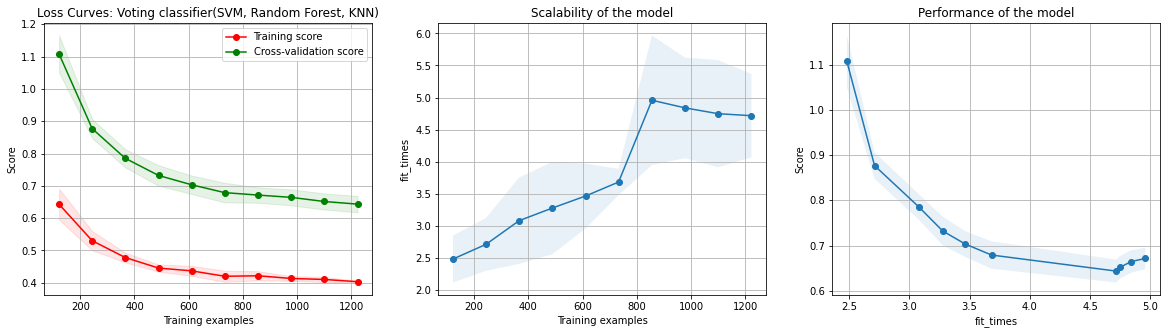

In [ ]:
title = r"Loss Curves: Voting classifier(SVM, Random Forest, KNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1, scorer='neg_log_loss')

plt.show()

**Learning Curves**

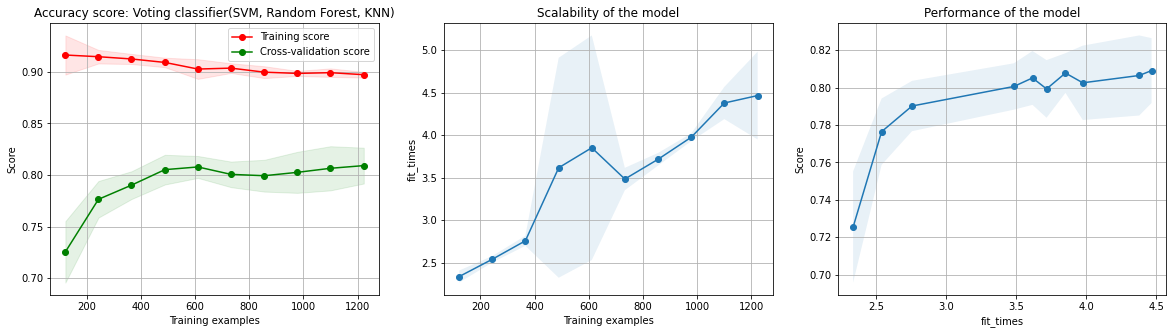

In [ ]:
title = r"Accuracy score: Voting classifier(SVM, Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

**Precision Cruves**

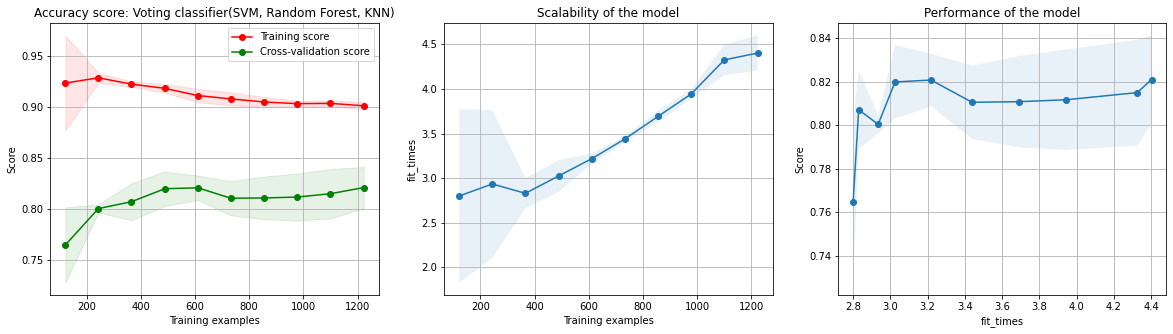

In [ ]:
title = r"Precision score: Voting classifier(SVM, Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS)], voting='soft')
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=-1, scorer=make_scorer(precision_score, average='macro'))
plt.show()

# Testing

accuracy: 0.8459530026109661 precision: 0.8474368451084139  recall: 0.8464410636662959


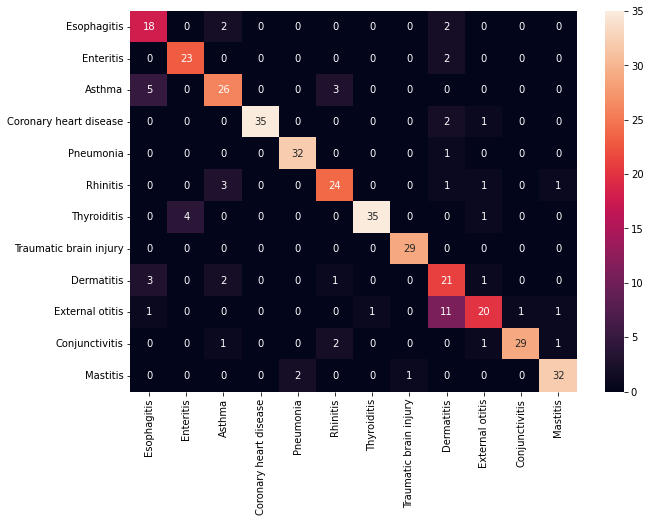

In [ ]:
clfSVC = svm.SVC(kernel='rbf', C=4, gamma=0.1, decision_function_shape='ovo', probability=True)
clfRndFS = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_depth=35, max_features='sqrt', min_samples_leaf=1, min_samples_split=10)

clf = VotingClassifier(estimators=[('svc', clfSVC), ('rf', clfRndFS)], voting='soft')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="macro")
recall = recall_score(y_test, predicted, average="macro")
print(f"accuracy: {accuracy} precision: {precision}  recall: {recall}")

conf_mat = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(conf_mat, index = [i for i in diseaseList], columns = [i for i in diseaseList])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)